<a href="https://colab.research.google.com/github/gmauricio-toledo/MetodosNumericos/blob/main/Tarea3-SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3
<h2>Solución</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import fabs

Función para graficar y para el error relativo

In [2]:
def graficar(f,a,b,num=100):
    eje_x = np.linspace(start=a,
                    stop=b,
                    num=num)
    eje_y = [f(x) for x in eje_x]  # Listas de compresión
    plt.figure(figsize=(7,5))
    plt.plot(eje_x,eje_y,color='red')
    plt.axhline(0,color='gray') # Dibujar eje X
    plt.show()

def error_relativo(x_real,x_aprox):
    return fabs(x_real-x_aprox)/fabs(x_real)

**Método de Newton**. El método está implementado como una función que regresa un diccionario con la raiz encontrada, el error final y el número de interaciones necesarias para obtener la raiz deseada. Además, la función imprime la aproximación y error relativo en cada iteración.

In [5]:
def newton(f,df,x0,tolerancia):
    '''
    f:  función a la que encontraremos la raiz
    df: derivada de la función
    x0: aproximación inicial de la raiz
    '''
    x_r = x0
    error = 2*tolerancia
    n_iteraciones = 0
    while (error>tolerancia):
        x_r_old = x_r
        x_r = x_r - f(x_r)/df(x_r)
        if x_r != 0:
            error = error_relativo(x_r,x_r_old)
        print(f"Iteración: {n_iteraciones+1} --- Aproximación: {x_r} --- Error: {error}")
        n_iteraciones += 1
    return {'raiz': x_r,
            'error': error,
            'iteraciones': n_iteraciones
            }

**Método de la secante**. El método está implementado como una función que regresa un diccionario con la raiz encontrada, el error final y el número de interaciones necesarias para obtener la raiz deseada. Además, la función imprime la aproximación y error relativo en cada iteración.

In [6]:
def secante(f,x0,x1,tolerancia):
    '''
    f:  función a la que encontraremos la raiz
    x0: primera aproximación de la raiz
    x1: segunda aproximación de la raiz
    '''
    error = 2*tolerancia
    n_iteraciones = 0
    while (error>tolerancia):
        x_next = x1 - f(x1)*(x0-x1)/(f(x0)-f(x1))
        if x1 != 0:
            error = error_relativo(x_next,x1)
        x0 = x1
        x1 = x_next
        print(f"Iteración: {n_iteraciones} --- Aproximación: {x_next} --- Error: {error}")
        n_iteraciones += 1
    return {'raiz': x_next,
            'error': error,
            'iteraciones': n_iteraciones
            }

**Método de iteración de punto fijo**. El método está implementado como una función que regresa un diccionario con la raiz encontrada, el error final y el número de interaciones necesarias para obtener la raiz deseada. Además, la función imprime la aproximación y error relativo en cada iteración.

In [18]:
def punto_fijo(g,x0,tolerancia):
    '''
    g:  función que describe el problema de punto fijo
    x0: aproximación inicial a la raiz
    '''
    error = 2*tolerancia
    n_iteraciones = 0
    while (error>tolerancia):
        x_anterior = x0
        x0 = g(x0)
        if x0 != 0:
            error = error_relativo(x0,x_anterior)
        print(f"Iteración: {n_iteraciones} --- Aproximación: {x0} --- Error: {error}")
        n_iteraciones += 1
    return {'raiz': x0,
            'error': error,
            'iteraciones': n_iteraciones
            }

# Ejercicio 1

Primero, convertir el problema en un problema de encontrar la raiz de una ecuación:

$$x^3-9x^2+26x-23.8=0 $$

y entonces, la función que usaremos es

$$f(x)=x^3-9x^2+26x-23.8$$

In [28]:
def f(x):
    y = x**3 - 9*x**2 + 26*x - 23.8
    return y

Definimos la tolerancia para todos los métodos

In [23]:
tolerancia = 1e-6

Graficamos la función

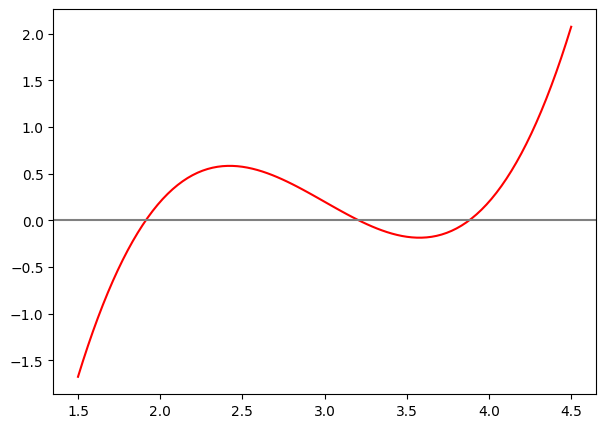

In [8]:
graficar(f,1.5,4.5)

## Método de Newton

Usando el método de Newton. Necesitamos la derivada, la cual es

$$f'(x)=3x^2-18x+26$$

In [26]:
def df(x):
    return 3*x**2-18*x+26

In [29]:
x_0 = 0

resultado = newton(f,df,x_0,tolerancia)

raiz = resultado['raiz']
error = resultado['error']
iteraciones = resultado['iteraciones']
secante
print(f"Solución aproximada: {raiz}")
print(f"Error relativo aproximado: {error}")
print(f"Evaluación: {f(raiz)}")
print(f"Número de iteraciones necesarias: {iteraciones}")

Iteración: 1 --- Aproximación: 0.9153846153846155 --- Error: 1.0
Iteración: 2 --- Aproximación: 1.4781835047016467 --- Error: 0.38073682159687294
Iteración: 3 --- Aproximación: 1.7812542571101082 --- Error: 0.17014457717011208
Iteración: 4 --- Aproximación: 1.8945369062446449 --- Error: 0.05979437442529731
Iteración: 5 --- Aproximación: 1.9115902072232507 --- Error: 0.008921002479593777
Iteración: 6 --- Aproximación: 1.9119659046942497 --- Error: 0.00019649799720620518
Iteración: 7 --- Aproximación: 1.9119660853086689 --- Error: 9.446528397459445e-08
Solución aproximada: 1.9119660853086689
Error relativo aproximado: 9.446528397459445e-08
Evaluación: -1.0658141036401503e-13
Número de iteraciones necesarias: 7


## Método de la secante

In [30]:
x_0 = 0
x_1 = 2

resultado = secante(f,0,2,tolerancia)

raiz = resultado['raiz']
error = resultado['error']
iteraciones = resultado['iteraciones']

print(f"Solución aproximada: {raiz}")
print(f"Error relativo aproximado: {error}")
print(f"Evaluación: {f(raiz)}")
print(f"Número de iteraciones necesarias: {iteraciones}")

Iteración: 0 --- Aproximación: 1.9833333333333334 --- Error: 0.008403361344537785
Iteración: 1 --- Aproximación: 1.9024522422435999 --- Error: 0.042514124293784546
Iteración: 2 --- Aproximación: 1.9128897024191094 --- Error: 0.0054563836912864955
Iteración: 3 --- Aproximación: 1.9119772335116476 --- Error: 0.00047723837474041416
Iteración: 4 --- Aproximación: 1.9119660721240763 --- Error: 5.8376493882501464e-06
Iteración: 5 --- Aproximación: 1.9119660853088962 --- Error: 6.895948627877487e-09
Solución aproximada: 1.9119660853088962
Error relativo aproximado: 6.895948627877487e-09
Evaluación: 4.760636329592671e-13
Número de iteraciones necesarias: 6


## Método de iteración de punto fijo

El problema de punto fijo que hay que resolver es $h(x)=x$ donde

$$h(x)=\frac{x^3-9x^2-23.8}{-26}$$

Definimos la función $h$

In [31]:
def h(x):
    return (x**3-9*x**2-23.8)/(-26)

In [32]:
x_0 = 0

resultado = punto_fijo(h,0,tolerancia)

raiz = resultado['raiz']
error = resultado['error']
iteraciones = resultado['iteraciones']

print(f"Solución aproximada: {raiz}")
print(f"Error relativo aproximado: {error}")
print(f"Evaluación: {f(raiz)}")
print(f"Número de iteraciones necesarias: {iteraciones}")

Iteración: 0 --- Aproximación: 0.9153846153846155 --- Error: 1.0
Iteración: 1 --- Aproximación: 1.175935909106824 --- Error: 0.2215692978710965
Iteración: 2 --- Aproximación: 1.3315120568827608 --- Error: 0.11684171162532342
Iteración: 3 --- Aproximación: 1.4382941946346057 --- Error: 0.07424220868733511
Iteración: 4 --- Aproximación: 1.5170317931400856 --- Error: 0.05190240498684731
Iteración: 5 --- Aproximación: 1.5777382399757518 --- Error: 0.03847688120723953
Iteración: 6 --- Aproximación: 1.6259970816128062 --- Error: 0.029679537671240507
Iteración: 7 --- Aproximación: 1.6652261290861656 --- Error: 0.023557790013112118
Iteración: 8 --- Aproximación: 1.6976602702452408 --- Error: 0.01910520127468719
Iteración: 9 --- Aproximación: 1.724835041892091 --- Error: 0.015754997426907755
Iteración: 10 --- Aproximación: 1.747847022701777 --- Error: 0.013165900968904418
Iteración: 11 --- Aproximación: 1.7675040033242422 --- Error: 0.011121321697430478
Iteración: 12 --- Aproximación: 1.7844164

# Ejercicio 2

Primero, convertir el problema en un problema de encontrar la raiz de una ecuación:

$$v - \sqrt{2gH}\tanh\left(\frac{\sqrt{2gH}}{2L}t\right)=0 $$

y entonces, la función que usaremos es

$$f(H)=v - \sqrt{2gH}\tanh\left(\frac{\sqrt{2gH}}{2L}t\right)$$

con $v=5 m/s$, $t=2.5s$, $L=4m$ y $g=9.81 m/s^2$.

In [33]:
from math import tanh, sqrt

v = 5
L = 4
g = 9.81
t = 2.5

def f(H):
    return v-sqrt(2*g*H)*tanh((sqrt(2*g*H)*t)/(2*L))

Definimos la tolerancia para todos los métodos

In [34]:
tolerancia = 1e-7

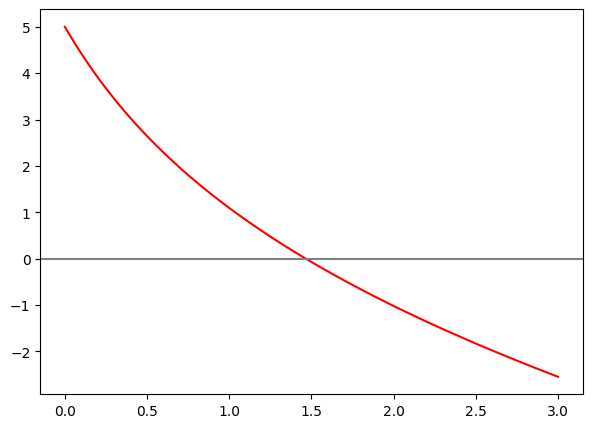

In [35]:
graficar(f,0,3)

## Método de Newton

La derivada es...

In [ ]:
x_0 = 0
x_1 = 2
tolerancia = 1e-7

resultado = newton(f,0,2,tolerancia)

raiz = resultado['raiz']
error = resultado['error']
iteraciones = resultado['iteraciones']

print(f"Solución aproximada: {raiz}")
print(f"Error relativo aproximado: {error}")
print(f"Evaluación: {f(raiz)}")
print(f"Número de iteraciones necesarias: {iteraciones}")

Solución aproximada: 1.4658945798873901
Error relativo aproximado: 8.132187074457899e-08
Evaluación: 1.809196170654559e-08
Número de iteraciones necesarias: 24


## Método de la secante

In [36]:
x_0 = 0
x_1 = 2

resultado = secante(f,0,2,tolerancia)

raiz = resultado['raiz']
error = resultado['error']
iteraciones = resultado['iteraciones']

print(f"Solución aproximada: {raiz}")
print(f"Error relativo aproximado: {error}")
print(f"Evaluación: {f(raiz)}")
print(f"Número de iteraciones necesarias: {iteraciones}")

Iteración: 0 --- Aproximación: 1.661330146513786 --- Error: 0.20385463671799067
Iteración: 1 --- Aproximación: 1.446145788331646 --- Error: 0.148798523577895
Iteración: 2 --- Aproximación: 1.4666765184969581 --- Error: 0.013998131085068389
Iteración: 3 --- Aproximación: 1.4658977937095734 --- Error: 0.0005312272047385344
Iteración: 4 --- Aproximación: 1.4658945879578944 --- Error: 2.1868909983962805e-06
Iteración: 5 --- Aproximación: 1.4658945884767887 --- Error: 3.539778814734894e-10
Solución aproximada: 1.4658945884767887
Error relativo aproximado: 3.539778814734894e-10
Evaluación: -8.881784197001252e-16
Número de iteraciones necesarias: 6


## Método de iteración de punto fijo

In [ ]:
def h(x):
    pass

Fue más rápido el método de la falsa posición ya que sólo necesito 17 iteraciones contra 24 que necesito el método de la bisección